# Multi-Stage Multi-Armed Bandits Model with Gradient Descent for parameter optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
def build_agent_arms(num_arms):
    # Build initial arms for the agent
    arms = []
    for i in range(num_arms):
        arm = {
            "Arm_ID": i + 1,
            "Parameter_at_End_of_Stage_1": np.random.uniform(0, 1),  # Initial parameter value
        }
        arms.append(arm)
    return arms

In [3]:
def evaluate_arms(arms):
    # Evaluate arms based on some criteria 
    for arm in arms:
        arm["Expected_Value_at_End_of_Stage_1"] = np.random.uniform(0, 1)  # Placeholder evaluation
    return arms


In [4]:
def test_agent_arms(arms):
    # Test arms to identify the best arm
    best_arm = select_best_arm(arms)
    return best_arm

In [5]:
def invest_agent_arms(best_arm):
    # Invest in the best arm and observe the outcome
    outcome = np.random.normal(best_arm["Expected_Value_at_End_of_Stage_1"], 0.1)  # Placeholder outcome
    return outcome

In [6]:
def calculate_loss(arms):
    # Calculate loss based on the provided solution method
    loss = 0
    for arm in arms:
        # Stage 3: Loss calculation
        if "Best_Arm" in arm:
            V_3_star = arm["Expected_Value_at_End_of_Stage_3"]
            V_i_double_star = arm["Second_Best_Arm_Value"]
            V_h_star = arm["Lowest_Expected_Value"]
            sigma_3_star_T_3 = arm["Error"]
            
            # Integral term for Stage 3
            theta_i_prime_star = arm["Parameter_at_End_of_Stage_2"]
            theta_i_double_prime_star = arm["Parameter_at_End_of_Stage_3"]
            integral_stage_3 = (theta_i_double_prime_star - theta_i_prime_star)**2
            
            # Integral term for Stage 2 (added with 1/2 weight)
            if "Parameter_at_End_of_Stage_1" in arm:
                theta_i_prime = arm["Parameter_at_End_of_Stage_1"]
                integral_stage_2 = 0.5 * (theta_i_prime_star - theta_i_prime)**2
            else:
                integral_stage_2 = 0
            
            # Loss calculation
            loss += ((V_3_star - V_i_double_star) / (V_3_star - V_h_star) * (1 - sigma_3_star_T_3))**(-1)
            loss += integral_stage_3 + integral_stage_2
    
    return loss

# apply Gradient Descent for parameter optimization in each stage

In [7]:
def optimize_stage_3(arms):
    for arm in arms:
        if "Best_Arm" in arm:
            # Perform optimization for Stage 3
            # Define loss function for optimization
            loss_fn = lambda params: calculate_loss_stage_3(arm, params)
            # Initial guess for parameters
            initial_params = [arm["Parameter_at_End_of_Stage_3"]]
            # Optimize parameters using gradient descent
            result = minimize(loss_fn, initial_params, method='L-BFGS-B', bounds=[(0, 1)])
            # Update arm's parameters
            arm["Parameter_at_End_of_Stage_3"] = result.x[0]

def calculate_loss_stage_3(arm, params):
    # Calculate loss for Stage 3
    arm["Parameter_at_End_of_Stage_3"] = params[0]
    # Calculate loss based on the provided loss function
    loss = calculate_loss(arms)
    return loss

In [8]:
def optimize_stage_2(arms):
    for arm in arms:
        if "Best_Arm" in arm:
            # Perform optimization for Stage 2
            # Define loss function for optimization
            loss_fn = lambda params: calculate_loss_stage_2(arm, params)
            # Initial guess for parameters
            initial_params = [arm["Parameter_at_End_of_Stage_2"]]
            # Optimize parameters using gradient descent
            result = minimize(loss_fn, initial_params, method='L-BFGS-B', bounds=[(0, 1)])
            # Update arm's parameters
            arm["Parameter_at_End_of_Stage_2"] = result.x[0]

def calculate_loss_stage_2(arm, params):
    # Calculate loss for Stage 2
    arm["Parameter_at_End_of_Stage_2"] = params[0]
    # Calculate loss based on the provided loss function
    loss = calculate_loss(arms)
    return loss

In [9]:
def optimize_stage_1(arms):
    for arm in arms:
        if "Best_Arm" in arm:
            # Perform optimization for Stage 1
            # Define loss function for optimization
            loss_fn = lambda params: calculate_loss_stage_1(arm, params)
            # Initial guess for parameters
            initial_params = [arm["Parameter_at_End_of_Stage_1"]]
            # Optimize parameters using gradient descent
            result = minimize(loss_fn, initial_params, method='L-BFGS-B', bounds=[(0, 1)])
            # Update arm's parameters
            arm["Parameter_at_End_of_Stage_1"] = result.x[0]

def calculate_loss_stage_1(arm, params):
    # Calculate loss for Stage 3
    arm["Parameter_at_End_of_Stage_1"] = params[0]
    # Calculate loss based on the provided loss function
    loss = calculate_loss(arms)
    return loss

In [10]:
def select_best_arm(arms):
    # Select the best arm based on the highest expected value
    best_arm = max(arms, key=lambda arm: arm["Expected_Value_at_End_of_Stage_1"])
    return best_arm

# Simulation

In [11]:
def simulate_mab_model(num_arms, num_iterations, alfa):
    # Simulate the multi-armed bandit model
    arms = build_agent_arms(num_arms)
    for i in range(num_iterations):
        
        # Stage 1: Build agent arms
        arms = evaluate_arms(arms)
        # Stage 2: Test agent arms
        best_arm = test_agent_arms(arms)
        # Stage 3: Invest agent arms
        outcome = invest_agent_arms(best_arm)
        # Stage 3: Calculate loss
        loss = calculate_loss(arms)
        
        # Stage 3: Optimize Stage 3
        optimize_stage_3(arms)
        # Stage 2: Optimize Stage 2
        optimize_stage_2(arms)
        # Stage 1: Optimize Stage 1
        optimize_stage_1(arms)
        print("Iteration:", i+1, "- Outcome:", outcome, "- Loss:", loss)
    return arms

In [12]:
def main():
    
    num_arms = 5
    num_iterations = 10
    alfa = 0.01
    
    simulate_mab_model(num_arms, num_iterations, alfa)

if __name__ == "__main__":
    main()

Iteration: 1 - Outcome: 0.8459829613280452 - Loss: 0
Iteration: 2 - Outcome: 0.5996623990157183 - Loss: 0
Iteration: 3 - Outcome: 0.917341082427067 - Loss: 0
Iteration: 4 - Outcome: 0.7956923607104767 - Loss: 0
Iteration: 5 - Outcome: 0.6456757333354781 - Loss: 0
Iteration: 6 - Outcome: 0.7416058620475919 - Loss: 0
Iteration: 7 - Outcome: 0.7094811014772344 - Loss: 0
Iteration: 8 - Outcome: 1.1154446383426155 - Loss: 0
Iteration: 9 - Outcome: 1.1535890156119424 - Loss: 0
Iteration: 10 - Outcome: 0.6054686179911182 - Loss: 0


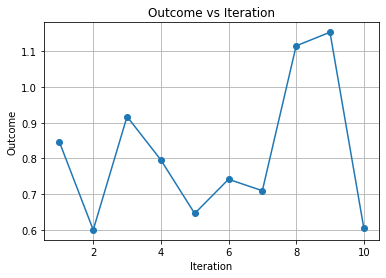

In [1]:
iterations = list(range(1, 11))
outcomes = [0.8459829613280452, 0.5996623990157183, 0.917341082427067, 0.7956923607104767, 0.6456757333354781,
            0.7416058620475919, 0.7094811014772344, 1.1154446383426155, 1.1535890156119424, 0.6054686179911182]

plt.plot(iterations, outcomes, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Outcome')
plt.title('Outcome vs Iteration')
plt.grid(True)
plt.show()
